# 0 Background

Detect a sunflower from an image

# Content Page

    1. Imports
    2. Load
    3. Detection
    4. Export

# 1 Imports

Import the required libraries

In [1]:
import numpy as np
import os
import pathlib
import six.moves.urllib as urllib
import sys
import tensorflow as tf

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# 2 Load

Load and install required packages

In [2]:
!pip install pycocotools

In [3]:
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [4]:
%%cmd
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

Microsoft Windows [Version 10.0.17763.805]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest>cd models/research/

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest\models\research>protoc object_detection/protos/*.proto --python_out=.

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest\models\research>

In [5]:
%%cmd
cd models/research
pip install .

Microsoft Windows [Version 10.0.17763.805]
(c) 2018 Microsoft Corporation. All rights reserved.

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest>cd models/research

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest\models\research>pip install .
Processing c:\users\hanza\onedrive\documents\seems\capstone -osiris\objectdetectiontest\models\research
  Stored in directory: C:\Users\hanza\AppData\Local\Temp\pip-ephem-wheel-cache-j87e_d0d\wheels\a7\e9\06\b3f596922706aac8e1df812a9520ecf913ec4cc35e2f4726d1
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1

(base) C:\Users\hanza\OneDrive\Documents\SEEMS\Capstone -OSIRIS\ObjectDetectionTest\models\research>

In [6]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [7]:
def load_model(model_name):
    
  model_dir = pathlib.Path('models/research/object_detection/sunflower_inference_graph/saved_model')

  model = tf.saved_model.load(str(model_dir))
  model = model.signatures['serving_default']

  return model

In [8]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'models/research/object_detection/training/object-detection.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [9]:
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/images/test')
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(3,11)]
TEST_IMAGE_PATHS

['models\\research\\object_detection\\images\\test\\image3.jpg',
 'models\\research\\object_detection\\images\\test\\image4.jpg',
 'models\\research\\object_detection\\images\\test\\image5.jpg',
 'models\\research\\object_detection\\images\\test\\image6.jpg',
 'models\\research\\object_detection\\images\\test\\image7.jpg',
 'models\\research\\object_detection\\images\\test\\image8.jpg',
 'models\\research\\object_detection\\images\\test\\image9.jpg',
 'models\\research\\object_detection\\images\\test\\image10.jpg']

# 3 Detection

Call and use model to detect sunflower

In [10]:
model_name = 'sunflower_inference_graph'
detection_model = load_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [11]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  output_dict = model(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

In [12]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(image_np))

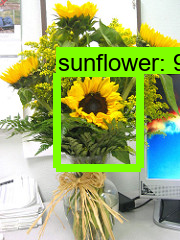

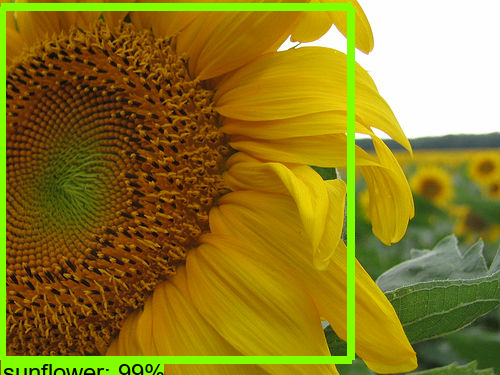

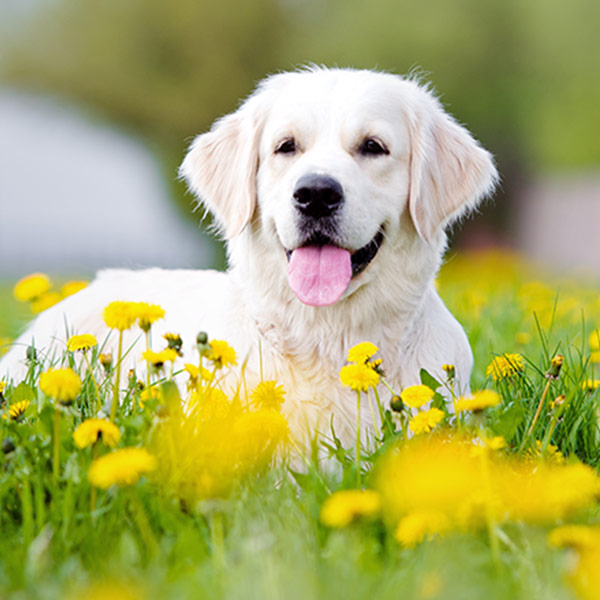

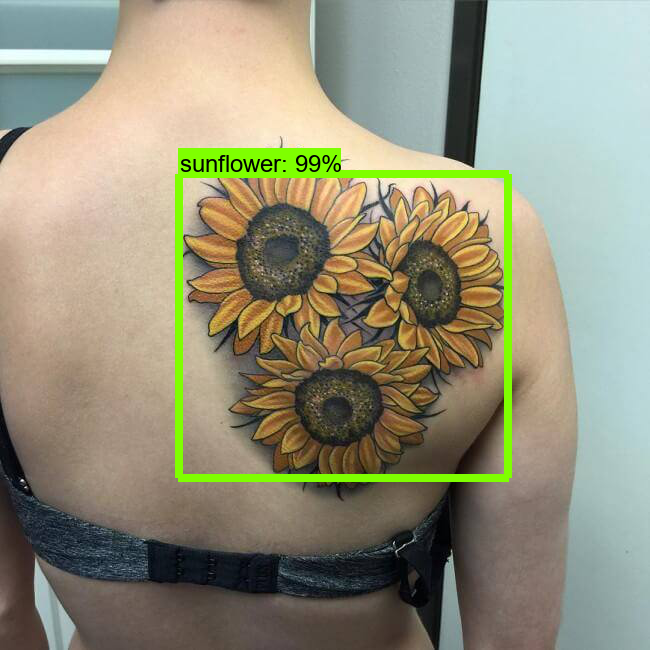

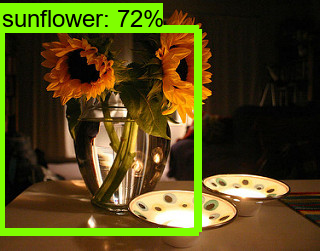

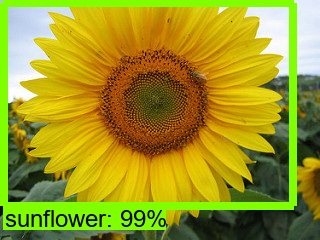

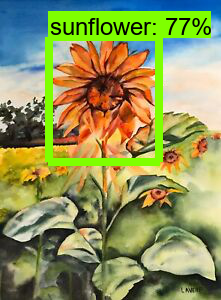

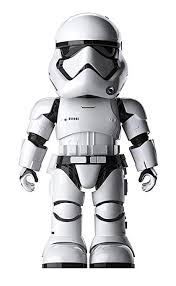

In [13]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

# 4 Export

To be completed soon - currently does nothing

In [37]:
img_name = []
img_class = []
img_file = []

In [38]:
def export_result(model, image_path):
    pass

In [40]:
for image_path in TEST_IMAGE_PATHS:
  export_result(detection_model, image_path)

For reference

In [41]:
#for index, img in enumerate(os.listdir(path)):
#    flower_type = CATEGORIES[np.argmax(predictions[index])]
#    label = "{}".format(flower_type)    
#    frame = cv2.putText(cv2.imread(os.path.join(path,img)),label, (10,25),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
#    cv2.imwrite('Output/output_test_' + str(index) + '.jpg', frame)